In [74]:
import networkx as nx
import geopandas
import momepy

In [75]:
roads_df  = geopandas.read_file('Data/AberdeenRoad.geojson')
roads_df=roads_df.explode(index_parts=True)

When you call
roads_df.explode(index_parts=True), you're essentially breaking apart these multipart geometries into individual, single-part geometries.
Each row that originally held a multipart geometry will be split into multiple rows, with each new row containing a single geometric component from the original multipart one

In [76]:
roads_df.head()

access  area bicycle bridge busway cycleway  foot      highway junction  \
0 0   None  None    None   None   None     None  None  residential     None   
  1   None  None    None   None   None     None  None  residential     None   
  2   None  None    None   None   None     None  None  residential     None   
  3   None  None    None   None   None     None  None  residential     None   
  4   None  None    None   None   None     None  None  residential     None   

    lanes  ... tunnel  turn width       id   timestamp version  \
0 0     2  ...   None  None  None  3508160  1706148094      22   
  1     2  ...   None  None  None  3508160  1706148094      22   
  2     2  ...   None  None  None  3508160  1706148094      22   
  3     2  ...   None  None  None  3508160  1706148094      22   
  4     2  ...   None  None  None  3508160  1706148094      22   

                                                  tags osm_type length  \
0 0  {'visible': False, 'abutters': 'residential', ...      way  317.0   
  1  {'visible': False, 'abutters': 'residential', ...      way  317.0   
  2  {'visible': False, 'abutters': 'residential', ...      way  317.0   
  3  {'visible': False, 'abutters': 'residential', ...      way  317.0   
  4  {'visible': False, 'abutters': 'residential', ...      way  317.0   

                                              geometry  
0 0  LINESTRING (-2.09683 57.16265, -2.09693 57.16265)  
  1  LINESTRING (-2.09693 57.16265, -2.09698 57.16265)  
  2  LINESTRING (-2.09698 57.16265, -2.09699 57.16265)  
  3  LINESTRING (-2.09699 57.16265, -2.09702 57.16265)  
  4  LINESTRING (-2.09702 57.16265, -2.09706 57.16265)  

[5 rows x 34 columns]

<Axes: >

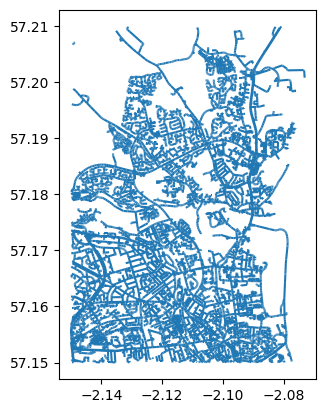

In [77]:
roads_df.plot()

In [78]:
#projected_df = roads_df.to_crs(crs='epsg:27700')  # Project to OSGB 36 (EPSG:27700)
#G_primal = momepy.gdf_to_nx(projected_df, approach="primal")
G_primal = momepy.gdf_to_nx(roads_df, approach="primal")


/home/ric/Projects/NetwokABMPy/venv/lib/python3.12/site-packages/momepy/utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


Momepy:

    Momepy is a Python library specifically designed for working with mobility networks. It provides functionalities for tasks like creating, manipulating, and analyzing graphs representing transportation networks.

gdf_to_nx Function:

    This function serves as a bridge between GeoPandas DataFrames and NetworkX graphs.
    It takes two main arguments:
        roads_df: This is your GeoPandas DataFrame that holds the road network information. Each row likely represents a road segment with geometry data (shape) and potentially other attributes.
        approach (optional): This argument specifies the conversion approach. In your case, it's set to "primal" (the default option).

Primal Approach:

    The "primal" approach in Momepy's gdf_to_nx function is the standard way to convert road networks from GeoPandas to NetworkX graphs.
    Here's what it does:
        Nodes (vertices) in the resulting NetworkX graph (G_primal) represent intersections or endpoints of road segments in your roads_df.
        Edges (connections) represent the road segments themselves. Each edge connects two nodes (intersections) based on the road geometry in your DataFrame.
        Any additional attributes present in your roads_df can be transferred as edge attributes in the NetworkX graph, providing more information about each road segment (e.g., road name, lane count, etc.).

Essentially, gdf_to_nx with the "primal" approach transforms your GeoPandas DataFrame representing a road network into a mathematical structure suitable for network analysis using NetworkX. This allows you to perform various graph-based analyses on your road network data, such as finding shortest paths, calculating network connectivity, or analyzing traffic flow patterns.

In [79]:
position =list(G_primal.nodes)
pos = {point: point for point in position}

Note that the network has nodes that point to themselves

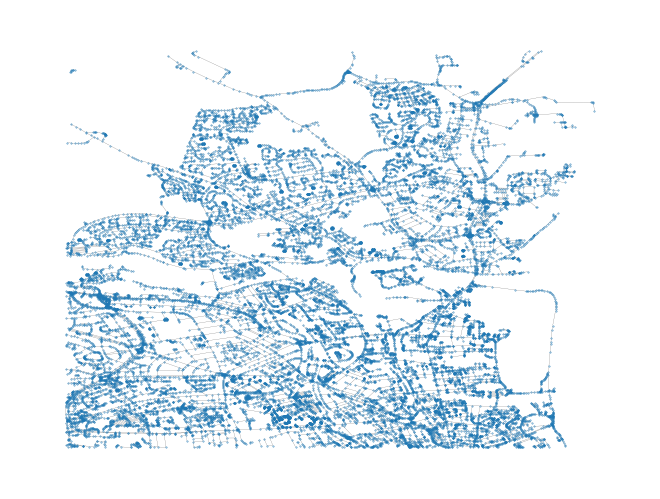

In [80]:
nx.draw(G_primal,pos=pos,node_size=0.1,width=0.1)

To remove loops

In [67]:
#self_loops = list(nx.selfloop_edges(G_primal))
#G_primal.remove_edges_from(self_loops)

In [81]:
components = list(nx.connected_components(G_primal.copy()))
largest_component = max(components, key=len)
len(largest_component)

25721

In [82]:
largest_road_network = G_primal.subgraph(largest_component)

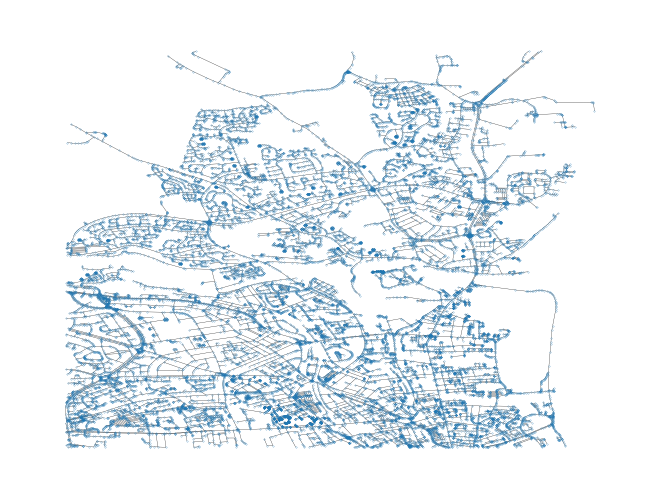

In [83]:
position =list(largest_road_network.nodes)
pos = {point: point for point in position}
nx.draw(largest_road_network,pos=pos,node_size=0.03,width=0.2)

In [84]:
for node, node_data in G_primal.nodes(data=True):
    print(f"Node ID: {node}")
    print(f"Attributes: {node_data}")
    break

Node ID: (-2.096826314926147, 57.162654876708984)
Attributes: {}


In [85]:
buildings  = geopandas.read_file('Data/AberdeenBuildings.geojson')

In [107]:
buildings['centroid'] = buildings.geometry.centroid

/tmp/ipykernel_12499/520841019.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['centroid'] = buildings.geometry.centroid


In [108]:
buildings.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,start_date,wikipedia,id,timestamp,version,tags,osm_type,changeset,geometry,centroid
0,None,None,None,None,None,None,None,None,Fraser Noble Building,None,...,None,None,7832985,1692645852,20,"{'name:be': 'Будынак імя Фрэйзера Нобла', 'nam...",way,NaN,"POLYGON ((-2.10545 57.16615, -2.10499 57.16617...",POINT (-2.10470 57.16592)
1,None,None,None,None,None,None,None,None,None,None,...,None,None,8056321,1654282973,10,None,way,NaN,"POLYGON ((-2.11318 57.15690, -2.11356 57.15673...",POINT (-2.11451 57.15845)
2,None,None,None,None,None,None,None,None,Harry Corry,None,...,None,None,8056358,1660604526,6,"{'brand': 'Harry Corry', 'brand:wikidata': 'Q5...",way,NaN,"POLYGON ((-2.11606 57.15741, -2.11537 57.15755...",POINT (-2.11566 57.15738)
3,None,None,None,None,None,None,None,None,None,None,...,None,None,8056359,1681137579,6,"{'roof:shape': 'flat', 'source:shape': 'bing'}",way,NaN,"POLYGON ((-2.11286 57.15639, -2.11266 57.15609...",POINT (-2.11285 57.15547)
4,Aberdeen,GB,None,Beach Boulevard Retail Park,AB11 5EJ,None,None,None,Asda,07:00-21:45,...,None,None,9704058,1711218668,16,"{'addr:unit': '1', 'brand': 'Asda', 'brand:wik...",way,NaN,"POLYGON ((-2.08188 57.15108, -2.08136 57.15052...",POINT (-2.08239 57.15059)


In [109]:
# Filter rows where 'col1' is equal to 2 or 4
homes_df = buildings.loc[buildings['building'].isin(['apartments','semidetached_house', 'terrace', 'detached', 'house',  'residential','bungalow', 'apartments;retail'])]
homes_df.head()


,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,start_date,wikipedia,id,timestamp,version,tags,osm_type,changeset,geometry,centroid
24,Aberdeen,None,75,None,AB25 1NL,None,Maberly Street,None,The Bastille,None,...,None,None,25941930,1635537464,6,None,way,NaN,"POLYGON ((-2.10801 57.15133, -2.10823 57.15152...",POINT (-2.10754 57.15163)
36,Aberdeen,None,254,None,AB25 2QU,None,Westburn Road,None,None,None,...,None,None,71958169,1653333721,6,"{'roof:levels': '1', 'roof:shape': 'side_hipped'}",way,NaN,"POLYGON ((-2.13069 57.15257, -2.13072 57.15269...",POINT (-2.13077 57.15262)
37,Aberdeen,None,5,None,AB25 2QW,None,Burnside Gardens,None,None,None,...,None,None,71958172,1653333721,4,"{'roof:levels': '1', 'roof:shape': 'side_hipped'}",way,NaN,"POLYGON ((-2.13060 57.15311, -2.13041 57.15307...",POINT (-2.13054 57.15305)
40,None,None,None,None,None,None,None,None,None,None,...,None,None,71958186,1617463003,3,None,way,NaN,"POLYGON ((-2.12595 57.15434, -2.12566 57.15369...",POINT (-2.12589 57.15400)
42,Aberdeen,GB,None,None,AB25 2LT,None,Westburn Road,None,None,None,...,None,None,71958201,1653333721,3,None,way,NaN,"POLYGON ((-2.12833 57.15282, -2.12824 57.15282...",POINT (-2.12816 57.15272)


In [110]:
schools_df = buildings.loc[buildings['building'].isin(['school'])]
schools_df.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,start_date,wikipedia,id,timestamp,version,tags,osm_type,changeset,geometry,centroid
153,None,None,None,Kittybrewster Primary School,None,None,None,None,None,None,...,None,None,106103630,1659686951,8,"{'roof:levels': '0', 'roof:shape': 'quadruple_...",way,NaN,"POLYGON ((-2.11650 57.16407, -2.11650 57.16394...",POINT (-2.11628 57.16409)
232,None,None,None,None,None,None,None,None,None,None,...,None,None,246883079,1384806318,1,"{'source:position': 'bing (not max zoom)', 'so...",way,NaN,"POLYGON ((-2.11789 57.17234, -2.11782 57.17229...",POINT (-2.11777 57.17245)
234,None,None,None,None,None,None,None,None,None,None,...,None,None,246905893,1384811881,1,None,way,NaN,"POLYGON ((-2.10124 57.18188, -2.10123 57.18189...",POINT (-2.10168 57.18186)
235,None,None,None,None,None,None,None,None,None,None,...,None,None,246919620,1384814767,1,None,way,NaN,"POLYGON ((-2.10883 57.18599, -2.10886 57.18595...",POINT (-2.10921 57.18599)
236,None,None,None,None,None,None,None,None,None,None,...,None,None,246925475,1621623074,2,"{'roof:shape': 'flat', 'source:shape': 'bing'}",way,NaN,"POLYGON ((-2.09756 57.19365, -2.09757 57.19360...",POINT (-2.09807 57.19375)


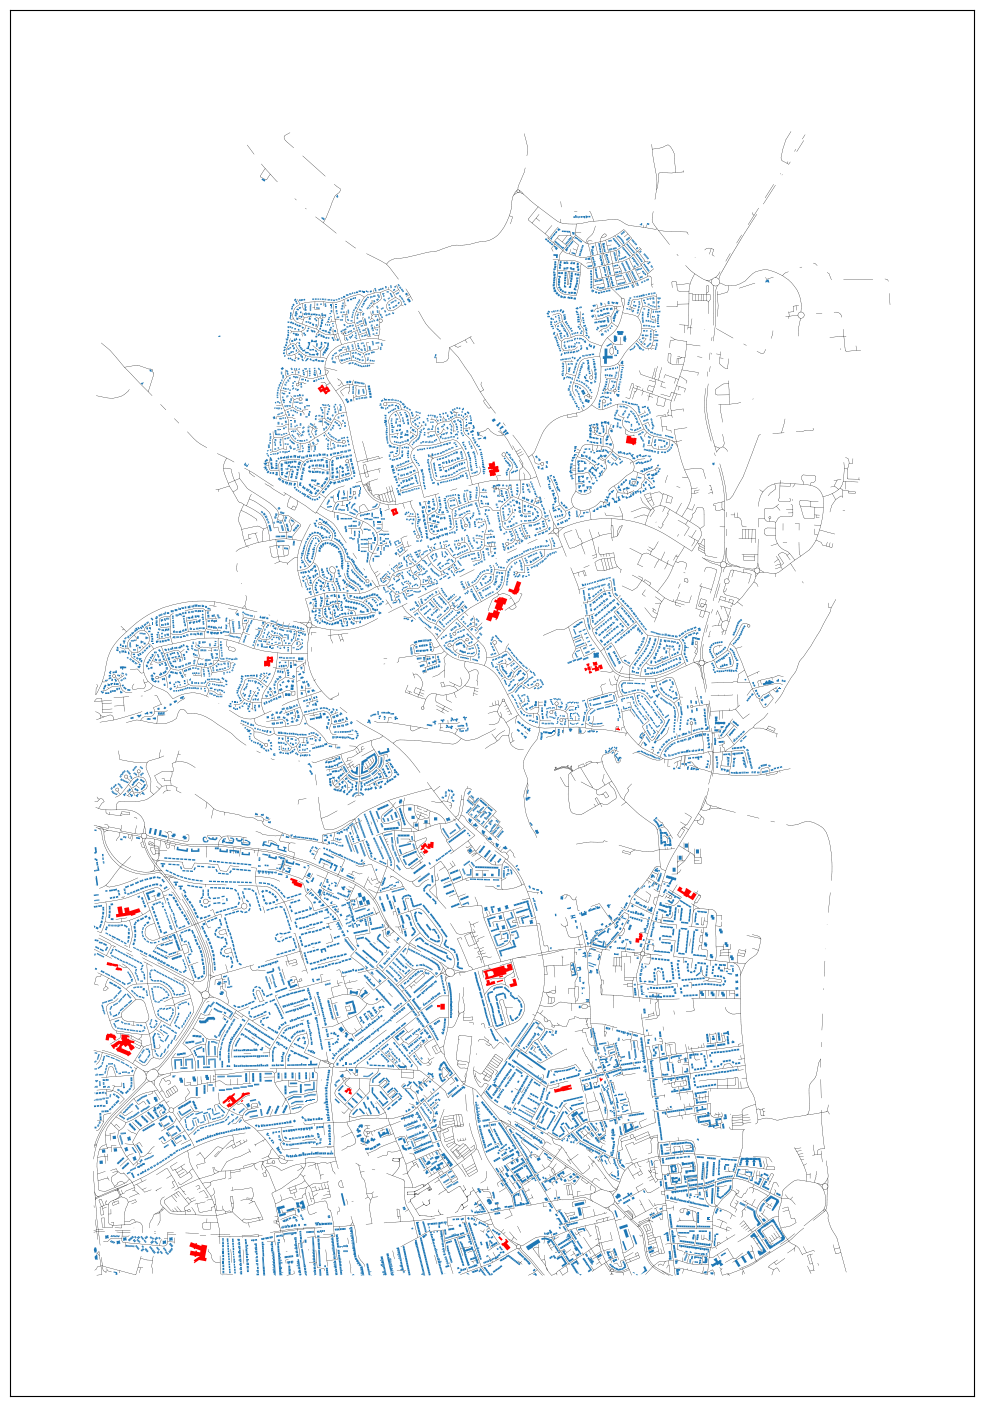

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 18))
nx.draw_networkx_edges(largest_road_network,ax=ax,pos=pos,width=0.2)
schools_df.plot(ax = ax,color="red")
homes_df.plot(ax = ax)
plt.savefig("Data/Aberdeen.png")

In [141]:
import math
def nearest_node(home):
    n = None
    d_min = 10000000
    for node in largest_road_network:
        d = math.dist(node,home)
        if d<d_min:
            n = node
            d_min = d
    return(n)

In [152]:
homes_df['road'] = homes_df.apply(lambda row: nearest_node((row["centroid"].x, row["centroid"].y)), axis=1)


/home/ric/Projects/NetwokABMPy/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [153]:
homes_df.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,id,timestamp,version,tags,osm_type,changeset,geometry,centroid,nearest_node,road
24,Aberdeen,None,75,None,AB25 1NL,None,Maberly Street,None,The Bastille,None,...,25941930,1635537464,6,None,way,NaN,"POLYGON ((-2.10801 57.15133, -2.10823 57.15152...",POINT (-2.10754 57.15163),NaN,"(-2.107434034347534, 57.151466369628906)"
36,Aberdeen,None,254,None,AB25 2QU,None,Westburn Road,None,None,None,...,71958169,1653333721,6,"{'roof:levels': '1', 'roof:shape': 'side_hipped'}",way,NaN,"POLYGON ((-2.13069 57.15257, -2.13072 57.15269...",POINT (-2.13077 57.15262),NaN,"(-2.131058692932129, 57.152366638183594)"
37,Aberdeen,None,5,None,AB25 2QW,None,Burnside Gardens,None,None,None,...,71958172,1653333721,4,"{'roof:levels': '1', 'roof:shape': 'side_hipped'}",way,NaN,"POLYGON ((-2.13060 57.15311, -2.13041 57.15307...",POINT (-2.13054 57.15305),NaN,"(-2.130463838577271, 57.1531867980957)"
40,None,None,None,None,None,None,None,None,None,None,...,71958186,1617463003,3,None,way,NaN,"POLYGON ((-2.12595 57.15434, -2.12566 57.15369...",POINT (-2.12589 57.15400),NaN,"(-2.125515460968018, 57.15391540527344)"
42,Aberdeen,GB,None,None,AB25 2LT,None,Westburn Road,None,None,None,...,71958201,1653333721,3,None,way,NaN,"POLYGON ((-2.12833 57.15282, -2.12824 57.15282...",POINT (-2.12816 57.15272),NaN,"(-2.12852144241333, 57.152503967285156)"


In [154]:
del homes_df["nearest_node"]

In [155]:
homes_df.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,...,wikipedia,id,timestamp,version,tags,osm_type,changeset,geometry,centroid,road
24,Aberdeen,None,75,None,AB25 1NL,None,Maberly Street,None,The Bastille,None,...,None,25941930,1635537464,6,None,way,NaN,"POLYGON ((-2.10801 57.15133, -2.10823 57.15152...",POINT (-2.10754 57.15163),"(-2.107434034347534, 57.151466369628906)"
36,Aberdeen,None,254,None,AB25 2QU,None,Westburn Road,None,None,None,...,None,71958169,1653333721,6,"{'roof:levels': '1', 'roof:shape': 'side_hipped'}",way,NaN,"POLYGON ((-2.13069 57.15257, -2.13072 57.15269...",POINT (-2.13077 57.15262),"(-2.131058692932129, 57.152366638183594)"
37,Aberdeen,None,5,None,AB25 2QW,None,Burnside Gardens,None,None,None,...,None,71958172,1653333721,4,"{'roof:levels': '1', 'roof:shape': 'side_hipped'}",way,NaN,"POLYGON ((-2.13060 57.15311, -2.13041 57.15307...",POINT (-2.13054 57.15305),"(-2.130463838577271, 57.1531867980957)"
40,None,None,None,None,None,None,None,None,None,None,...,None,71958186,1617463003,3,None,way,NaN,"POLYGON ((-2.12595 57.15434, -2.12566 57.15369...",POINT (-2.12589 57.15400),"(-2.125515460968018, 57.15391540527344)"
42,Aberdeen,GB,None,None,AB25 2LT,None,Westburn Road,None,None,None,...,None,71958201,1653333721,3,None,way,NaN,"POLYGON ((-2.12833 57.15282, -2.12824 57.15282...",POINT (-2.12816 57.15272),"(-2.12852144241333, 57.152503967285156)"
